In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt

In [4]:
def accuracyVal(valX,valY,a,b):
    total = np.shape(valX)[0]
    count = 0
    for row in valX.iterrows():
        if (np.sign(np.dot(a,row[1])+b)) == np.sign(valY.iloc[row[0]]):
            count = count+1
    return count/total
def predict1(testX,a,b):
    total = np.shape(testX)[0]
    count = 0
    pred = []
    for row in testX.iterrows():
        if (np.dot(a,row[1])+b) > 0:
            pred.append(">50K")
            count= count+1
        else:
            pred.append("<=50K")
            
    return pred,count

In [5]:
train = pd.read_csv("train.data",header = None,encoding='utf-8')
test = pd.read_csv("test.data",header = None)

In [6]:
train = train.drop([1,3,5,6,7,8,9,13], axis = 1)
test = test.drop([1,3,5,6,7,8,9,13], axis = 1)

In [7]:
trainY = train[14]
trainX = train.drop([14],axis = 1)

In [8]:
trainY = trainY.where(trainY==" <=50K",other = 1)
trainY = trainY.where(trainY==1,other = -1)

In [9]:
normalizedX = (trainX-trainX.mean())/trainX.std()
testNorm = (test-test.mean())/test.std()

In [10]:
lamb = np.array([1*10**-3,0.01,0.1,1])

In [11]:
k = 30

In [14]:
Nb = 1
Ns = 300
a = np.random.uniform(low = -1.00, high = 1.00, size = np.shape(normalizedX)[1])
b =np.random.uniform(low = -1.00, high = 1.00)
lambAccuracy = []

for lambval in lamb:
    epochAccuracy = []
    for e in range(1,51):
        #Here split into train and test
        
        normalizedX_train, normalizedX_val, trainingY, validationY = train_test_split(normalizedX,trainY,test_size = 0.1)
        trainingY = trainingY.reset_index(drop = True)
        normalizedX_train = normalizedX_train.reset_index(drop = True)
        
        validationY = validationY.reset_index(drop = True)
        normalizedX_val = normalizedX_val.reset_index(drop = True)

        stepSize = 1/(50+e)
        
        # go through Ns number of steps (ie: no. of times to change a and b)
        for kk in range(0,Ns):
            rand = random.randint(0,np.shape(normalizedX_train)[0]-1)
            yr = trainingY.iloc[rand]
            xr = normalizedX_train.iloc[rand]
            check = yr*(np.dot(a,xr)+b)
            if check >=1:
                a = a - (stepSize*lambval*a)
                b = b - stepSize*0
            else:
                a = a - (stepSize*(lambval*a - yr*xr))
                b = b - (stepSize*-yr)
        epochAccuracy.append(accuracyVal(normalizedX_val,validationY,a,b))
    lambAccuracy.append(epochAccuracy)

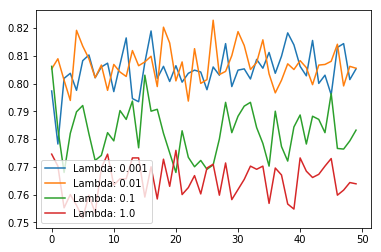

In [41]:
plt.plot(lambAccuracy[0])
plt.plot(lambAccuracy[1])
plt.plot(lambAccuracy[2])
plt.plot(lambAccuracy[3])
plt.legend(["Lambda: 0.001","Lambda: 0.01","Lambda: 0.1","Lambda: 1.0"])

In [15]:
np.mean(lambAccuracy, axis = 1)
for i in range(0,4):
    print(lambAccuracy[i][-1])

0.805277525022748
0.8055050045495905
0.7832120109190173
0.7638762511373977


Choosing Lambda as $1 * 10^{-2}$ (ie: 0.01)

In [16]:
k = 30
lambAccuracy1 = []
lambmag = []
for lambval in lamb:
    accuracyPlot = []
    magPlot = []
    a = np.random.uniform(low = -1.00, high = 1.00, size = np.shape(normalizedX_train)[1])
    b = np.random.uniform(low = -1.00, high = 1.00)
    for e in range(1,51):
            #Here split into train and test

    #         normalizedX_train, normalizedX_val, trainingY, validationY = train_test_split(normalizedX,trainY,test_size = 0.1)
            normalizedX_train = normalizedX
            trainingY = trainY

            trainingY = trainingY.reset_index(drop = True)
            normalizedX_train = normalizedX_train.reset_index(drop = True)

            stepSize = 1/(50+e)

            heldoutidx = np.random.randint(0,np.shape(normalizedX_train)[0]-1,50)

            heldoutX = normalizedX_train.iloc[heldoutidx]
            heldoutY = trainingY.iloc[heldoutidx]

            heldoutX = heldoutX.reset_index(drop = True)
            heldoutY = heldoutY.reset_index(drop = True)

            # go through Ns number of steps (ie: no. of times to change a and b)
            for kk in range(1,Ns+1):
                rand = random.randint(0,np.shape(normalizedX_train)[0]-1)
                yr = trainingY.iloc[rand]
                xr = normalizedX_train.iloc[rand]
                check = yr*(np.dot(a,xr)+b)
                if check >=1:
                    a = a - (stepSize*lambval*a)
                    b = b - stepSize*0
                else:
                    a = a - (stepSize*(lambval*a - yr*xr))
                    b = b - (stepSize*-yr)
                if ((kk%k) == 0):
                    accuracyPlot.append(accuracyVal(heldoutX,heldoutY,a,b))
                    magPlot.append(np.linalg.norm(a))
    lambAccuracy1.append(accuracyPlot)
    lambmag.append(magPlot)


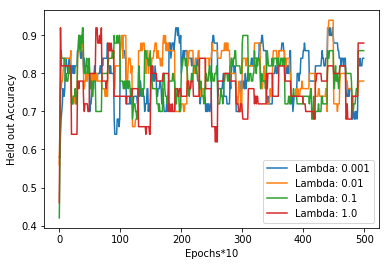

In [17]:
plt.figure()
plt.plot(lambAccuracy1[0])
plt.plot(lambAccuracy1[1])
plt.plot(lambAccuracy1[2])
plt.plot(lambAccuracy1[3])
plt.xlabel("Epochs*10")
plt.ylabel("Held out Accuracy")
plt.legend(["Lambda: 0.001","Lambda: 0.01","Lambda: 0.1","Lambda: 1.0"])

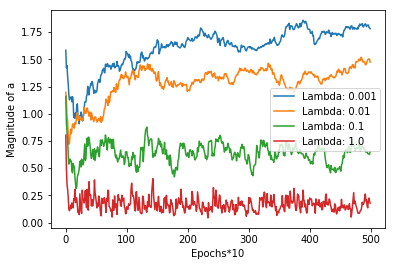

In [18]:
plt.figure()
plt.plot(lambmag[0])
plt.plot(lambmag[1])
plt.plot(lambmag[2])
plt.plot(lambmag[3])
plt.xlabel("Epochs*10")
plt.ylabel("Magnitude of a")
plt.legend(["Lambda: 0.001","Lambda: 0.01","Lambda: 0.1","Lambda: 1.0"])

In [47]:
type(dffinal['Example'][1])

NameError: name 'dffinal' is not defined

In [208]:
file = open('kgoenka.csv','w')
file.write('Example,Label\n')
for i in range(len(prediction)):
    file.write('\'{}\',{}\n'.format(i, prediction[i]))
file.close()

In [135]:
lambval = 0.01
accuracyPlot = []
magPlot = []
a = np.random.uniform(low = -1.00, high = 1.00, size = np.shape(normalizedX_train)[1])
b = np.random.uniform(low = -1.00, high = 1.00)
Ns = 600
#Here split into train and test

#         normalizedX_train, normalizedX_val, trainingY, validationY = train_test_split(normalizedX,trainY,test_size = 0.1)
normalizedX_train = normalizedX
trainingY = trainY

trainingY = trainingY.reset_index(drop = True)
normalizedX_train = normalizedX_train.reset_index(drop = True)

stepSize = 1/(50+50)

heldoutidx = np.random.randint(0,np.shape(normalizedX_train)[0]-1,50)

heldoutX = normalizedX_train.iloc[heldoutidx]
heldoutY = trainingY.iloc[heldoutidx]

heldoutX = heldoutX.reset_index(drop = True)
heldoutY = heldoutY.reset_index(drop = True)

# go through Ns number of steps (ie: no. of times to change a and b)
for kk in range(1,Ns+1):
    rand = random.randint(0,np.shape(normalizedX_train)[0]-1)
    yr = trainingY.iloc[rand]
    xr = normalizedX_train.iloc[rand]
    check = yr*(np.dot(a,xr)+b)
    if check >=1:
        a = a - (stepSize*lambval*a)
        b = b - stepSize*0
    else:
        a = a - (stepSize*(lambval*a - yr*xr))
        b = b - (stepSize*-yr)
    if ((kk%k) == 0):
        accuracyPlot.append(accuracyVal(heldoutX,heldoutY,a,b))
        magPlot.append(np.linalg.norm(a))

In [136]:
prediction,c = predict1(testNorm,a,b)
file = open('kgoenka-14.csv','w')
file.write('Example,Label\n')
for i in range(len(prediction)):
    file.write('\'{}\',{}\n'.format(i, prediction[i]))
file.close()

In [137]:
c

432